<a href="https://colab.research.google.com/github/samuelard7/ECEProject/blob/main/Presentation1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv('drive/MyDrive/GoogleColab/Placement_Data_Full_Class.csv',header=0)
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [63]:
df.head()


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [64]:
df.shape

(215, 15)

In [65]:
df.isna().values.any()

True

In [66]:
df.shape

(215, 15)

In [67]:
df = df.fillna(0)
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


**Gender Difference**

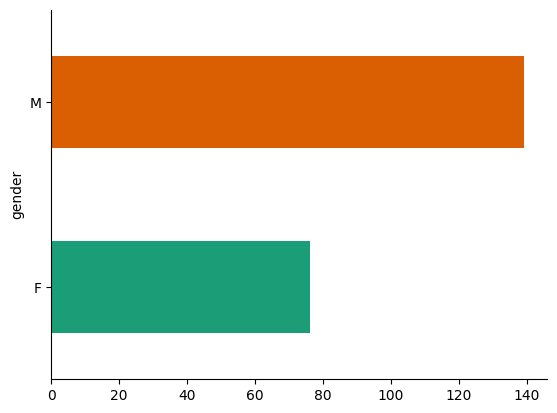

In [69]:
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Streams**

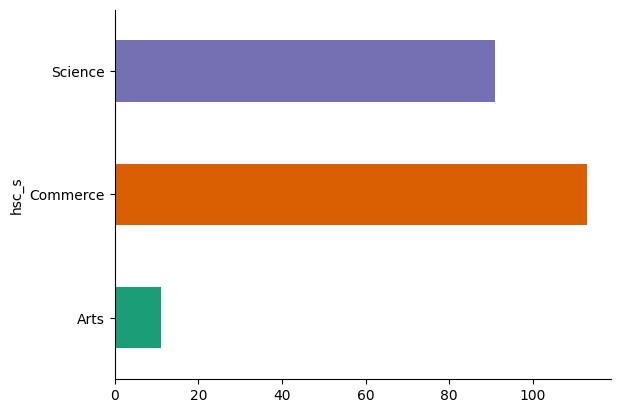

In [70]:
df.groupby('hsc_s').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [71]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [72]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


**Linear Regression:**
The model has relatively low RMSE and MAE on the training set, indicating decent performance. However, the R2 score is low, suggesting that the model explains only a small portion of the variance in the data. On the testing set, the performance is even worse, with negative R2 score, indicating that the model performs worse than a simple horizontal line.

In [73]:
df[['gender','degree_p','workex','salary']]

,gender,degree_p,workex,salary
0,M,58.00,No,270000.0
1,M,77.48,Yes,200000.0
2,M,64.00,No,250000.0
3,M,52.00,No,0.0
4,M,73.30,No,425000.0
...,...,...,...,...
210,M,77.60,No,400000.0
211,M,72.00,No,275000.0
212,M,73.00,Yes,295000.0
213,F,58.00,No,204000.0


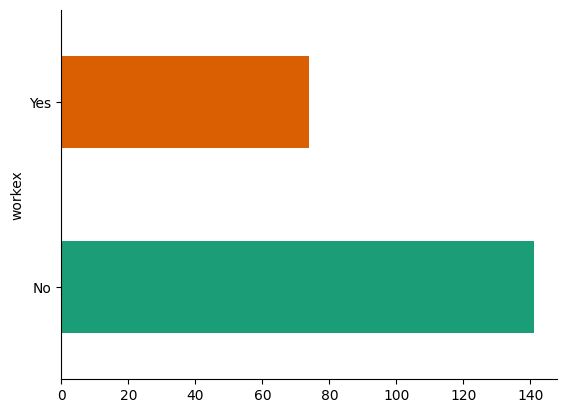

In [74]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('workex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

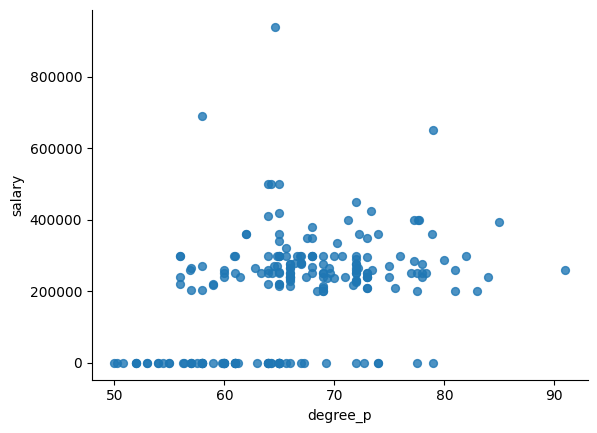

In [75]:
df.plot(kind='scatter', x='degree_p', y='salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [76]:
df[['mba_p','degree_t','specialisation','salary']]

,mba_p,degree_t,specialisation,salary
0,58.80,Sci&Tech,Mkt&HR,270000.0
1,66.28,Sci&Tech,Mkt&Fin,200000.0
2,57.80,Comm&Mgmt,Mkt&Fin,250000.0
3,59.43,Sci&Tech,Mkt&HR,0.0
4,55.50,Comm&Mgmt,Mkt&Fin,425000.0
...,...,...,...,...
210,74.49,Comm&Mgmt,Mkt&Fin,400000.0
211,53.62,Sci&Tech,Mkt&Fin,275000.0
212,69.72,Comm&Mgmt,Mkt&Fin,295000.0
213,60.23,Comm&Mgmt,Mkt&HR,204000.0


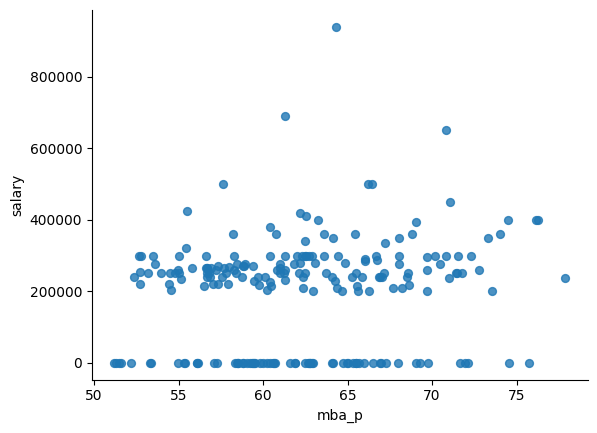

In [77]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='mba_p', y='salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

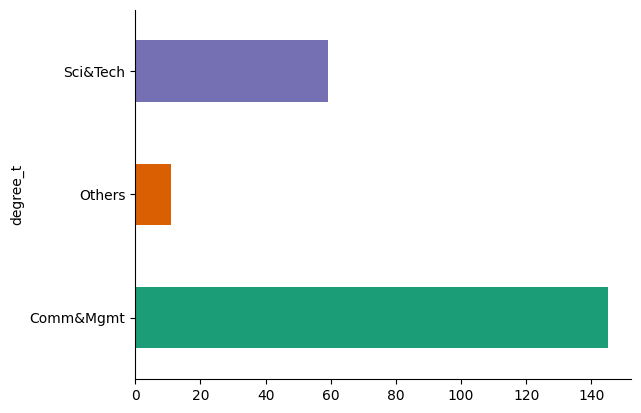

In [78]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('degree_t').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

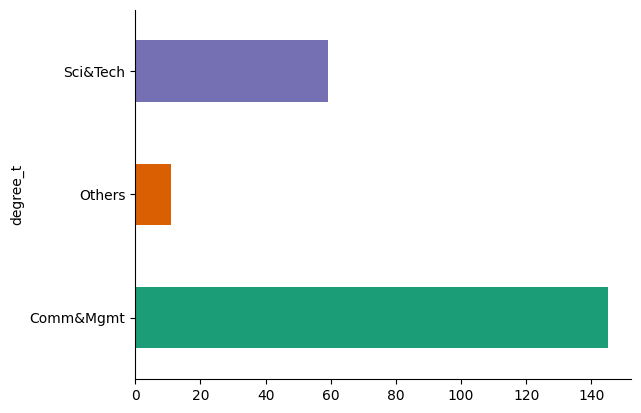

In [79]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('degree_t').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [80]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


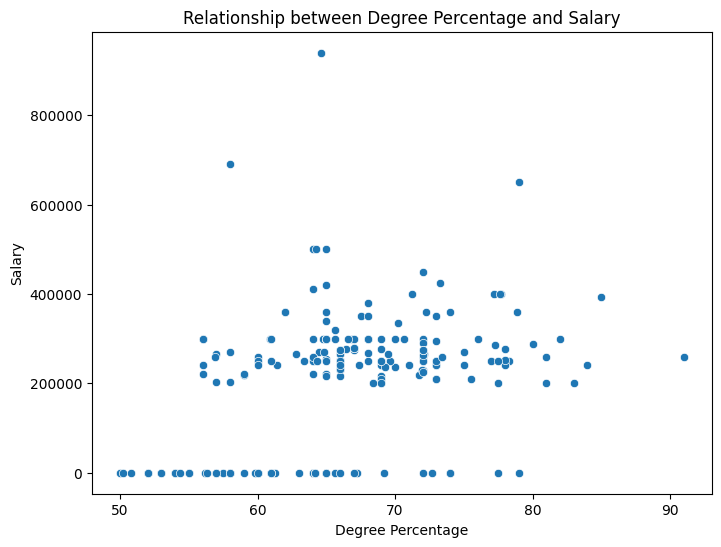

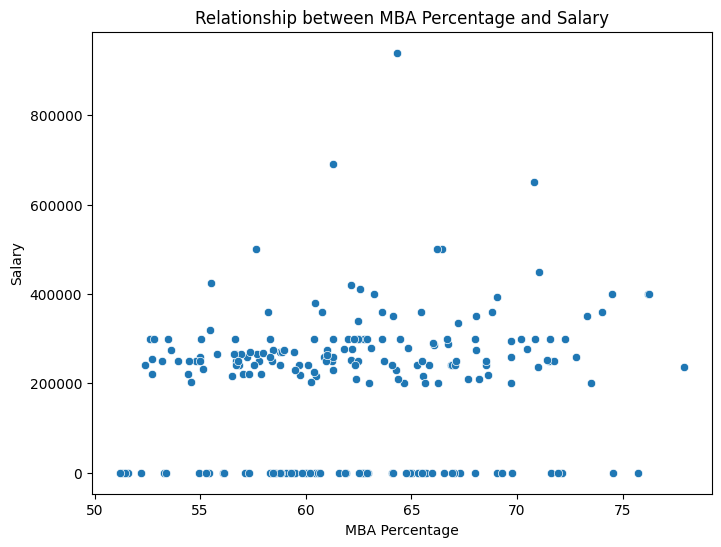

Correlation between Degree Percentage and Salary: 0.4083707811765698
Correlation between MBA Percentage and Salary: 0.13982273892615557


In [81]:
# prompt: 4. Relationship between Degree Percentage and Salary:
# #   - There appears to be a weak positive correlation between degree percentage and salary, suggesting that higher degree percentages might be associated with higher salaries.
# # 5. Relationship between MBA Percentage and Salary:
# #   - Similar to degree percentage, there might be a weak positive correlation between MBA percentage and salary.

import matplotlib.pyplot as plt
# 4. Relationship between Degree Percentage and Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='degree_p', y='salary', data=df)
plt.title('Relationship between Degree Percentage and Salary')
plt.xlabel('Degree Percentage')
plt.ylabel('Salary')
plt.show()

# 5. Relationship between MBA Percentage and Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mba_p', y='salary', data=df)
plt.title('Relationship between MBA Percentage and Salary')
plt.xlabel('MBA Percentage')
plt.ylabel('Salary')
plt.show()

# Calculate correlation coefficients for further analysis
correlation_degree_salary = df['degree_p'].corr(df['salary'])
correlation_mba_salary = df['mba_p'].corr(df['salary'])

print(f"Correlation between Degree Percentage and Salary: {correlation_degree_salary}")
print(f"Correlation between MBA Percentage and Salary: {correlation_mba_salary}")
